In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')

In [142]:
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn import tree
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor
)
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_squared_log_error,
    median_absolute_error
)


In [76]:
df=pd.read_csv("/content/Travel.csv")

In [77]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [78]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [79]:
df.drop("CustomerID",axis=1,inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [81]:
for feature in df.columns:
  if df[feature].dtypes == "O":
    print(df[feature].value_counts())
    print("\n")

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64




In [82]:
df["Gender"]=df["Gender"].replace("Fe Male","Female")
df["MaritalStatus"]=df["MaritalStatus"].replace("Single","Unmarried")

In [83]:
for feature in df.columns:
  if df[feature].dtypes == "O":
    print(df[feature].value_counts())
    print("\n")

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


Gender
Male      2916
Female    1972
Name: count, dtype: int64


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64


Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64




In [84]:
df.isnull().sum()

,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45
ProductPitched,0


In [85]:
for feature in df.columns:
  if df[feature].dtypes == "O":
    print(f"mode of {feature} : {df[feature].mode()[0]}")
  else :
    print(f"mean of {feature} : {df[feature].mean()}")

mean of ProdTaken : 0.18821603927986907
mean of Age : 37.62226512226512
mode of TypeofContact : Self Enquiry
mean of CityTier : 1.6542553191489362
mean of DurationOfPitch : 15.490834591330602
mode of Occupation : Salaried
mode of Gender : Male
mean of NumberOfPersonVisiting : 2.9050736497545007
mean of NumberOfFollowups : 3.708445178608301
mode of ProductPitched : Basic
mean of PreferredPropertyStar : 3.581036610448375
mode of MaritalStatus : Married
mean of NumberOfTrips : 3.236520640269587
mean of Passport : 0.2909165302782324
mean of PitchSatisfactionScore : 3.078150572831424
mean of OwnCar : 0.6202945990180033
mean of NumberOfChildrenVisiting : 1.1872666943177106
mode of Designation : Executive
mean of MonthlyIncome : 23619.85349087003


In [86]:
num_feature=[feature for feature in df.columns if df[feature].dtype != "O"]

In [87]:
cat_feature=[feature for feature in df.columns if df[feature].dtype == "O"]

In [88]:
num_feature

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [89]:
cat_feature

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [90]:
num_data=df[num_feature]

In [91]:
cat_data=df[cat_feature]

In [92]:
num_data

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [93]:
num_data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [94]:
for feature in df.columns:
  if feature in num_feature:
    df[feature].fillna(df[feature].mean(),inplace=True)
  else :
    df[feature].fillna(df[feature].mode()[0],inplace=True)

In [95]:
cat_data

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Unmarried,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Unmarried,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Unmarried,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Unmarried,Executive


In [96]:
df.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


In [97]:
df.select_dtypes(include="O")

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Unmarried,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Unmarried,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Unmarried,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Unmarried,Executive


In [98]:
cat_features=df.select_dtypes(include="O").columns

In [99]:
num_features=df.select_dtypes(exclude="O").columns

In [100]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [101]:
num_features

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [113]:
num_features=[feature for feature in num_features if feature != "ProdTaken"]

In [114]:
num_features

['Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [115]:
transformer1=OneHotEncoder(drop="first")
transformer2=StandardScaler()

In [116]:
preprocessor=ColumnTransformer([
    ("one_hot_encoder",transformer1,cat_features),
    ("standard_scaler",transformer2,num_features)
])

In [117]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [118]:
x=df.drop("ProdTaken",axis=1)
y=pd.DataFrame(df["ProdTaken"],columns=["ProdTaken"])

In [119]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [120]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [121]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3666, 18), (1222, 18), (3666, 1), (1222, 1))

In [122]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [123]:
models={
    "Logistic_regression":LogisticRegression(),
    "decision_tree":DecisionTreeClassifier(),
    "random_forest":RandomForestClassifier()
}

In [132]:
for model in list(models.values()):
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  print(f"model : {model}")
  print(f"training metrix : ")
  print(f"accuracy score : {accuracy_score(y_train,y_train_pred)}")
  print(f"confusion matrix : \n{confusion_matrix(y_train,y_train_pred)}")
  print(f"classification report : \n{classification_report(y_train,y_train_pred)}")
  print(f"auc roc score : {roc_auc_score(y_train,y_train_pred)}")

  print(f"testing metrix : ")
  print(f"accuracy score : {accuracy_score(y_test,y_test_pred)}")
  print(f"confusion matrix : \n{confusion_matrix(y_test,y_test_pred)}")
  print(f"classification report : \n{classification_report(y_test,y_test_pred)}")
  print(f"auc roc score : {roc_auc_score(y_test,y_test_pred)}")
  print("\n")

model : LogisticRegression()
training metrix : 
accuracy score : 0.851063829787234
confusion matrix : 
[[2891   86]
 [ 460  229]]
classification report : 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2977
           1       0.73      0.33      0.46       689

    accuracy                           0.85      3666
   macro avg       0.79      0.65      0.68      3666
weighted avg       0.84      0.85      0.83      3666

auc roc score : 0.6517388025174133
testing metrix : 
accuracy score : 0.8306055646481179
confusion matrix : 
[[956  35]
 [172  59]]
classification report : 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       991
           1       0.63      0.26      0.36       231

    accuracy                           0.83      1222
   macro avg       0.74      0.61      0.63      1222
weighted avg       0.81      0.83      0.80      1222

auc roc score : 0.6100466973322674

In [146]:
param_distributions=dict({
    "n_estimators":[100],
    "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"],
    "max_depth":[10,20,30],
    "min_samples_split":[2,5,10]
})

In [147]:
model_desc=[
    ("decision tree",RandomForestRegressor(),param_distributions)
]

In [148]:
for name,model,params in model_desc:
  processor=RandomizedSearchCV(
      estimator=model,
      param_distributions=params,
      cv=5,
      n_jobs=-1,
      verbose=1
  )
  processor.fit(x_train,y_train)

  print(f"model : {name}")
  print(f"best parameters : {processor.best_params_}")
  print(f"best score : {processor.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
model : decision tree
best parameters : {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 30, 'criterion': 'squared_error'}
best score : 0.5937428334092527


In [152]:
model=RandomForestRegressor(
    n_estimators=100,
    min_samples_split= 2,
    max_depth= 30,
    criterion= 'squared_error'
)

In [153]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=30)

In [154]:
fpr,tpr,threshold=roc_curve(y_test,model.predict(x_test))

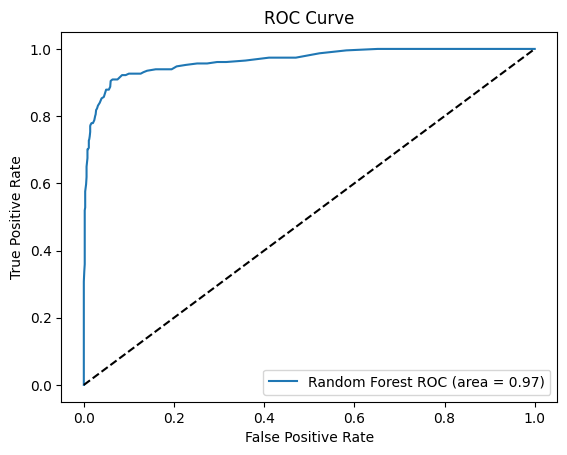

In [158]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="Random Forest ROC (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

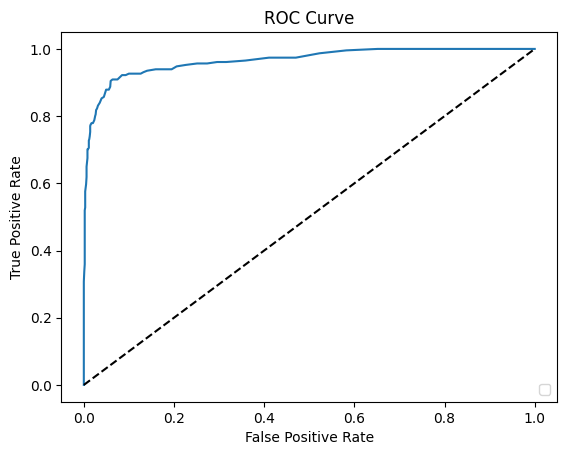

In [159]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()